In [1]:
import pandas as pd
import os
import csv
import ast
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_names = os.listdir('../../Preprocess/GadgetX-NewMDCLUSTER-1/combined-csv/')

In [3]:
dataframes = []
for file_name in file_names:
    df = pd.read_csv(f'../../Preprocess/GadgetX-NewMDCLUSTER-1/combined-csv/{file_name}')
    dataframes.append(df)

In [4]:
all_data = pd.concat(dataframes)

# Convert the 'ProgenitorsID' column from string to list
all_data['ProgenitorsID'] = all_data['ProgenitorsID'].apply(ast.literal_eval)

# Sort the snapshots in descending order
all_data = all_data.sort_values(by=['snapshot', 'ID'], ascending=[False, True])

In [5]:
training_data = pd.read_csv('../../Preprocess/GadgetX-NewMDCLUSTER-1/progenitor-pair/128 snapshots-reduced/v2/training_data.csv')

In [6]:
len(training_data.index)

658908

In [7]:
training_data.head()

,hostHalo,numSubStruct,Mvir,npart,Xc,Yc,Zc,VXc,VYc,VZc,...,progenitor_Phi0,progenitor_cNFW,progenitor_ID,progenitor_numProgenitors,progenitor_ProgenitorsID,progenitor_redshift,progenitor_snapshot,rel_location,rel_velocity,Is_Progenitor
0,122000000000001,0,7.692290e+10,145,499906.668493,500198.003224,499913.299084,-568.82,-1836.12,-1626.31,...,15569.3,-1.0000,121000000006488,0,[-1],0.168,121,3017.914974,3642.293649,0
1,122000000000001,0,7.692290e+10,145,499906.668493,500198.003224,499913.299084,-568.82,-1836.12,-1626.31,...,169494.0,26.9302,121000000000462,1,[120000000000389],0.168,121,2706.483903,3977.063611,0
2,88000000000275,0,1.375210e+10,171,501803.625375,492068.283260,489277.470857,-169.17,-125.75,672.46,...,62344.6,-1.0000,87000000002688,1,[81000000001891],1.480,87,142.768232,100.982342,1
3,0,0,8.480220e+10,101,482164.053963,499916.727726,496461.100303,503.21,-360.71,-135.91,...,100883.0,26.6265,100000000004152,1,[99000000004149],0.858,100,4135.861245,659.412098,0
4,0,0,4.867230e+10,53,505733.966827,491471.586319,508446.191366,-1137.31,634.72,-454.39,...,20427.0,15.9005,103000000008841,1,[102000000009364],0.738,103,345.708750,45.263222,1


In [8]:
select_features = ['numSubStruct', 'Mvir', 'npart', 'Xc', 'Yc', 'Zc', 'VXc', 'VYc', 'VZc', 'Rvir', 'Rmax', 'r2', 
           'mbp_offset', 'com_offset', 'Vmax', 'v_esc', 'sigV', 'lambda', 'lambdaE', 'Lx', 'Ly', 'Lz', 'b', 'c', 'Eax',
           'Eay', 'Eaz', 'Ebx', 'Eby', 'Ebz', 'Ecx', 'Ecy', 'Ecz', 'ovdens', 'nbins', 'fMhires', 'Ekin', 'Epot', 'SurfP',
           'Phi0', 'cNFW', 'numProgenitors', 'redshift', 'snapshot', 
           'progenitor_numSubStruct', 'progenitor_Mvir', 'progenitor_npart', 'progenitor_Xc', 'progenitor_Yc', 
           'progenitor_Zc', 'progenitor_VXc', 'progenitor_VYc', 'progenitor_VZc', 'progenitor_Rvir', 'progenitor_Rmax',
           'progenitor_r2', 'progenitor_mbp_offset', 'progenitor_com_offset', 'progenitor_Vmax', 'progenitor_v_esc', 
           'progenitor_sigV', 'progenitor_lambda', 'progenitor_lambdaE', 'progenitor_Lx', 'progenitor_Ly', 'progenitor_Lz', 
           'progenitor_b', 'progenitor_c', 'progenitor_Eax', 'progenitor_Eay', 'progenitor_Eaz', 'progenitor_Ebx',
           'progenitor_Eby', 'progenitor_Ebz', 'progenitor_Ecx', 'progenitor_Ecy', 'progenitor_Ecz', 'progenitor_ovdens',
           'progenitor_nbins', 'progenitor_fMhires', 'progenitor_Ekin', 'progenitor_Epot', 'progenitor_SurfP', 
           'progenitor_Phi0', 'progenitor_cNFW', 'progenitor_numProgenitors', 
           'progenitor_redshift', 'progenitor_snapshot', 'Is_Progenitor']

# Select only the defined features from the training data
training_data = training_data[select_features]

training_data.head()


,numSubStruct,Mvir,npart,Xc,Yc,Zc,VXc,VYc,VZc,Rvir,...,progenitor_fMhires,progenitor_Ekin,progenitor_Epot,progenitor_SurfP,progenitor_Phi0,progenitor_cNFW,progenitor_numProgenitors,progenitor_redshift,progenitor_snapshot,Is_Progenitor
0,0,7.692290e+10,145,499906.668493,500198.003224,499913.299084,-568.82,-1836.12,-1626.31,52.23,...,0.0,2.308630e+13,-7.113480e+13,-3.664760e+12,15569.3,-1.0000,0,0.168,121,0
1,0,7.692290e+10,145,499906.668493,500198.003224,499913.299084,-568.82,-1836.12,-1626.31,52.23,...,1.0,9.145370e+15,-1.848580e+16,-2.892620e+15,169494.0,26.9302,1,0.168,121,0
2,0,1.375210e+10,171,501803.625375,492068.283260,489277.470857,-169.17,-125.75,672.46,6.73,...,1.0,3.791900e+14,-6.026960e+14,-5.028770e+14,62344.6,-1.0000,1,1.480,87,1
3,0,8.480220e+10,101,482164.053963,499916.727726,496461.100303,503.21,-360.71,-135.91,98.27,...,1.0,7.847890e+14,-2.213700e+15,-2.460620e+14,100883.0,26.6265,1,0.858,100,0
4,0,4.867230e+10,53,505733.966827,491471.586319,508446.191366,-1137.31,634.72,-454.39,83.03,...,1.0,1.184630e+14,-2.883790e+14,-2.529360e+13,20427.0,15.9005,1,0.738,103,1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = training_data.drop('Is_Progenitor', axis=1)
y = training_data['Is_Progenitor']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import binarize

weights = {0: 1, 1: 20}
# Train the Random Forest model
model = RandomForestClassifier(class_weight=weights, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Change the threshold here
threshold = 0.5
y_pred = binarize(y_pred_prob.reshape(1, -1), threshold=threshold)[0]

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     65910
           1       1.00      0.98      0.99     65872

    accuracy                           0.99    131782
   macro avg       0.99      0.99      0.99    131782
weighted avg       0.99      0.99      0.99    131782



-------------------------------------------

# Functions

In [14]:
import warnings
warnings.filterwarnings('ignore')

def create_merger_tree(halo, model, scaler, snapshot_dict, threshold=0.5, cache=None, processed_snapshots=None):
    if cache is None:
        cache = {}
    if processed_snapshots is None:
        processed_snapshots = set()

    merger_tree = [halo]
    
    select_features = ['numSubStruct', 'Mvir', 'npart', 'Xc', 'Yc', 'Zc', 'VXc', 'VYc', 'VZc', 'Rvir', 'Rmax', 'r2', 
            'mbp_offset', 'com_offset', 'Vmax', 'v_esc', 'sigV', 'lambda', 'lambdaE', 'Lx', 'Ly', 'Lz', 'b', 'c', 'Eax',
            'Eay', 'Eaz', 'Ebx', 'Eby', 'Ebz', 'Ecx', 'Ecy', 'Ecz', 'ovdens', 'nbins', 'fMhires', 'Ekin', 'Epot', 'SurfP',
            'Phi0', 'cNFW', 'numProgenitors', 'redshift', 'snapshot', 
            'progenitor_numSubStruct', 'progenitor_Mvir', 'progenitor_npart', 'progenitor_Xc', 'progenitor_Yc', 
            'progenitor_Zc', 'progenitor_VXc', 'progenitor_VYc', 'progenitor_VZc', 'progenitor_Rvir', 'progenitor_Rmax',
            'progenitor_r2', 'progenitor_mbp_offset', 'progenitor_com_offset', 'progenitor_Vmax', 'progenitor_v_esc', 
            'progenitor_sigV', 'progenitor_lambda', 'progenitor_lambdaE', 'progenitor_Lx', 'progenitor_Ly', 'progenitor_Lz', 
            'progenitor_b', 'progenitor_c', 'progenitor_Eax', 'progenitor_Eay', 'progenitor_Eaz', 'progenitor_Ebx',
            'progenitor_Eby', 'progenitor_Ebz', 'progenitor_Ecx', 'progenitor_Ecy', 'progenitor_Ecz', 'progenitor_ovdens',
            'progenitor_nbins', 'progenitor_fMhires', 'progenitor_Ekin', 'progenitor_Epot', 'progenitor_SurfP', 
            'progenitor_Phi0', 'progenitor_cNFW', 'progenitor_numProgenitors', 
            'progenitor_redshift', 'progenitor_snapshot']
    
    previous_snapshot = halo['snapshot'] - 1
    
    # Check if previous halos have been cached
    if previous_snapshot not in snapshot_dict:
        return merger_tree
    
    previous_halos = snapshot_dict[previous_snapshot]
    feature_vectors = []
    halo_pairs = []
    
    for _, previous_halo in previous_halos.iterrows():
        # Create the feature vector for the current pair of halos
        pair = pd.concat([halo, previous_halo.rename(lambda x: f'progenitor_{x}')])

        # calculate relative location and velocity
        rel_location = sum((pair[dim_c] - pair[f'progenitor_{dim_c}']) ** 2 for dim, dim_c in zip(['X', 'Y', 'Z'], ['Xc', 'Yc', 'Zc']))
        rel_velocity = sum((pair[dim_c] - pair[f'progenitor_{dim_c}']) ** 2 for dim, dim_c in zip(['VX', 'VY', 'VZ'], ['VXc', 'VYc', 'VZc']))
        
        pair['rel_location'] = np.sqrt(rel_location)
        pair['rel_velocity'] = np.sqrt(rel_velocity)

        feature_vector = pair[select_features]
        feature_vectors.append(scaler.transform(feature_vector.values.reshape(1, -1)))
        halo_pairs.append(previous_halo)
    
    # Batch predict
    pred_probs = model.predict_proba(np.vstack(feature_vectors))[:, 1]
    predictions = binarize(pred_probs.reshape(-1, 1), threshold=threshold).flatten()
    
    for pred, previous_halo in zip(predictions, halo_pairs):
        if pred == 1:
            merger_tree.append(previous_halo)
            # Check cache before making a recursive call
            if previous_halo.name not in cache:
                cache[previous_halo.name] = create_merger_tree(previous_halo, model, scaler, snapshot_dict, threshold, cache, processed_snapshots)
            merger_tree += cache[previous_halo.name]
                
    return merger_tree


def track_halo_history_predicted(halo, model, scaler, all_data):
    snapshot_dict = {snap: df for snap, df in all_data.groupby('snapshot')}
    history = create_merger_tree(halo, model, scaler, snapshot_dict)
    return pd.DataFrame(history)

def track_halo_history_real(halo_id, snapshot, df):
    halo = df[(df['ID'] == halo_id) & (df['snapshot'] == snapshot)]
    if len(halo) == 0:
        return pd.DataFrame()
    progenitors = halo.iloc[0]['ProgenitorsID']
    history = halo
    if progenitors:
        for progenitor in progenitors:
            if progenitor == -1:  # Ignore the progenitor if its ID is -1
                continue
            progenitor_history = track_halo_history_real(progenitor, snapshot - 1, df)
            history = pd.concat([history, progenitor_history])
    return history


def plot_halo_history(halo_id, real_halo_history, predicted_halo_history, title):
    fig, ax1 = plt.subplots(figsize=(12, 8))

    id_to_point_real = {row['ID']: (row['redshift'], row['Mvir'] / 1e11) for _, row in real_halo_history.iterrows()}
    id_to_point_predicted = {row['ID']: (row['redshift'], row['Mvir'] / 1e11) for _, row in predicted_halo_history.iterrows()}

    real_progenitors = {row['ID']: set(row['ProgenitorsID']) for _, row in real_halo_history.iterrows()}
    predicted_progenitors = {row['ID']: set(row['ProgenitorsID']) for _, row in predicted_halo_history.iterrows()}

    # Set the font dictionaries (for title and labels)
    font_title = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 25}
    font_axes = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 25}
    font_legend = {'size': 12}

    # Plot the real history first with zorder=2
    for id_to_point, halo_history, color, line_style, label in [(id_to_point_real, real_halo_history, 'red', '-', 'False Negative')]:
        for group_id, group in halo_history.groupby('ID'):
            for _, row in group.iterrows():
                for progenitor in row['ProgenitorsID']:
                    if progenitor == -1 or progenitor not in id_to_point:
                        continue
                    x_values = [id_to_point[group_id][0], id_to_point[progenitor][0]]
                    y_values = [id_to_point[group_id][1], id_to_point[progenitor][1]]
                    ax1.plot(x_values, y_values, line_style, color=color, alpha=0.7, zorder=2)
                point_color = 'orange' if row['ID'] == halo_id else color
                ax1.plot(row['redshift'], row['Mvir'] / 1e11, 'o', linestyle=line_style, color=point_color, markersize=15, zorder=2)

    # Plot False Positives with zorder=1
    for group_id, group in predicted_halo_history.groupby('ID'):
        for _, row in group.iterrows():
            for progenitor in row['ProgenitorsID']:
                if progenitor == -1 or progenitor not in id_to_point_predicted:
                    continue
                real_pred = real_progenitors.get(row['ID'], set())
                predicted_pred = predicted_progenitors.get(row['ID'], set())
                if progenitor not in real_pred and progenitor in predicted_pred:  # False positive
                    x_values = [id_to_point_predicted[row['ID']][0], id_to_point_predicted[progenitor][0]]
                    y_values = [id_to_point_predicted[row['ID']][1], id_to_point_predicted[progenitor][1]]
                    ax1.plot(x_values, y_values, color='blue', alpha=1, zorder=1)
                    ax1.plot(row['redshift'], row['Mvir'] / 1e11, 'o', color='blue', markersize=15, zorder=1)

    for group_id, group in predicted_halo_history.groupby('ID'):
        for _, row in group.iterrows():
            real_pred = real_progenitors.get(row['ID'], set())
            predicted_pred = predicted_progenitors.get(row['ID'], set())
            
            current_halo_is_tp = real_pred == predicted_pred
            
            if current_halo_is_tp:
                ax1.plot(row['redshift'], row['Mvir'] / 1e11, 'o', color='green', markersize=15, zorder=3)
            else:
                ax1.plot(row['redshift'], row['Mvir'] / 1e11, 'o', color='blue', markersize=15, zorder=2)
            
            for progenitor in row['ProgenitorsID']:
                if progenitor == -1 or progenitor not in id_to_point_predicted:
                    continue
                
                progenitor_is_tp = real_progenitors.get(progenitor, set()) == predicted_progenitors.get(progenitor, set())
                
                x_values = [id_to_point_predicted[row['ID']][0], id_to_point_predicted[progenitor][0]]
                y_values = [id_to_point_predicted[row['ID']][1], id_to_point_predicted[progenitor][1]]
                
                if current_halo_is_tp and progenitor_is_tp:  # Green-Green connection
                    ax1.plot(x_values, y_values, color='green', alpha=1, zorder=3)
                else:  # Any other connection type
                    ax1.plot(x_values, y_values, color='blue', alpha=1, zorder=2)
        
    final_halo_row_real = real_halo_history[real_halo_history['ID'] == halo_id].iloc[0]
    final_halo_row_predicted = predicted_halo_history[predicted_halo_history['ID'] == halo_id].iloc[0]
    ax1.plot(final_halo_row_real['redshift'], final_halo_row_real['Mvir'] / 1e11, 'o', color='orange', markersize=15, zorder=4)
    ax1.plot(final_halo_row_predicted['redshift'], final_halo_row_predicted['Mvir'] / 1e11, 'o', color='orange', markersize=15, zorder=4)
                    
    # Legend entries
    ax1.plot([], [], 'o', color='orange', label='Final Halo')
    ax1.plot([], [], 'o', linestyle=' ', color='green', label='True Positive')
    ax1.plot([], [], 'o', linestyle=' ', color='blue', label='False Positive')
    ax1.plot([], [], 'o', linestyle=' ', color='red', label='False Negative')

    # Set the axes labels
    ax1.set_xlabel('Redshift', fontdict=font_axes)
    ax1.set_ylabel(r'$M_{\mathrm{vir}} \, / \, 10^{11} M_{\odot}$', fontdict=font_axes)
    plt.title(title, fontdict=font_title, pad=20)
    ax1.legend(fontsize=font_legend['size'])
    ax1.tick_params(axis='both', labelsize=20)
    plt.gca().invert_xaxis()
    plt.show()


def plot_halo_history_separate(halo_id, halo_history, title, subplot=None, line_color='red'):
    # Set the font dictionaries (for title and labels)
    font_title = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'size': 25}
    font_axes = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 25}
    font_legend = {'size': 12}
    
    if subplot is not None:
        ax1 = plt.subplot(*subplot)
    else:
        ax1 = plt.gca()

    id_to_point = {row['ID']: (row['redshift'], row['Mvir']) for _, row in halo_history.iterrows()}

    for _, row in halo_history.iterrows():
        for progenitor in row['ProgenitorsID']:
            if progenitor == -1 or progenitor not in id_to_point:
                continue
            x_values = [id_to_point[row['ID']][0], id_to_point[progenitor][0]]
            y_values = [id_to_point[row['ID']][1], id_to_point[progenitor][1]]
            ax1.plot(x_values, y_values, color=line_color, linestyle='solid')

    for _, row in halo_history.iterrows():
        if row['ID'] == halo_id:
            point_color = 'orange'
            markersize = 15
            marker = 'o'
        else:
            point_color = line_color
            markersize = 15
            marker = 'o'
        ax1.plot(row['redshift'], row['Mvir'], marker, color=point_color, markersize=markersize)

    ax1.set_xlabel('Redshift', fontdict=font_axes)
    ax1.set_ylabel(r'$M_{\mathrm{vir}} \, / \, 10^{11} M_{\odot}$', fontdict=font_axes)
    ax1.set_title(title, fontdict=font_title)
    ax1.tick_params(axis='both', labelsize=20)
    ax1.invert_xaxis()
    
def plot_real_and_predicted_history(halo_id, real_halo_history, predicted_halo_history):
    plt.figure(figsize=(20, 8))
    plot_halo_history_separate(halo_id, real_halo_history, 'AHF Merger History', subplot=(1, 2, 1), line_color='green')
    plot_halo_history_separate(halo_id, predicted_halo_history, 'Predicted Halo Merger History', subplot=(1, 2, 2), line_color='blue')
    plt.tight_layout()
    plt.show()



-----------------------------------

# Testing

In [15]:
new_file_names = os.listdir('../../Preprocess/GadgetX-NewMDCLUSTER-2/combined-csv/')

dataframes = []
for new_file_names in new_file_names:
    df = pd.read_csv(f'../../Preprocess/GadgetX-NewMDCLUSTER-2/combined-csv/{new_file_names}')
    dataframes.append(df)

new_data = pd.concat(dataframes)

new_data['ProgenitorsID'] = new_data['ProgenitorsID'].apply(ast.literal_eval)

new_data = new_data.sort_values(by=['snapshot', 'ID'], ascending=[False, True])

{'0': {'precision': 0.98830466902104, 'recall': 0.6013473956854953, 'f1-score': 0.7477289553539301, 'support': 450944}, '1': {'precision': 0.713516226962335, 'recall': 0.9928838170593245, 'f1-score': 0.8303313369477833, 'support': 450944}, 'accuracy': 0.7971156063724099, 'macro avg': {'precision': 0.8509104479916875, 'recall': 0.7971156063724099, 'f1-score': 0.7890301461508566, 'support': 901888}, 'weighted avg': {'precision': 0.8509104479916876, 'recall': 0.7971156063724099, 'f1-score': 0.7890301461508568, 'support': 901888}}


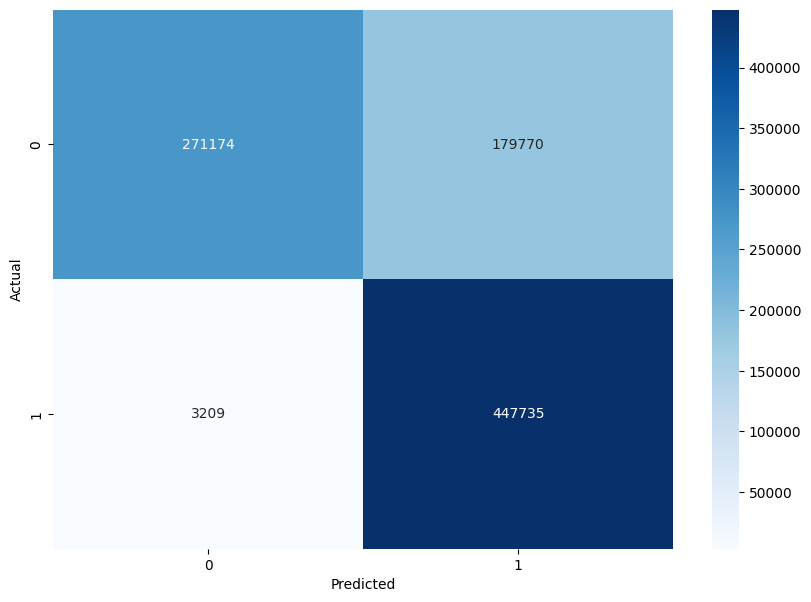

Accuracy:  0.7971156063724099


In [17]:
testing_data = pd.read_csv('../../Preprocess/GadgetX-NewMDCLUSTER-2/progenitor-pair/testing_data_128.csv')
testing_data = testing_data[select_features]
X_new = testing_data.drop('Is_Progenitor', axis=1)
y_new = testing_data['Is_Progenitor']
X_new_scaled = scaler.transform(X_new)
y_new_pred_prob = model.predict_proba(X_new_scaled)[:, 1]
y_new_pred = binarize(y_new_pred_prob.reshape(1, -1), threshold=threshold)[0]
report = classification_report(y_new, y_new_pred, output_dict=True)
print(report)
cm = confusion_matrix(y_new, y_new_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy = accuracy_score(y_new, y_new_pred)
print('Accuracy: ', accuracy)

In [18]:
df = pd.DataFrame(report).transpose()
df.to_csv('report/random-forest-128-all-features.csv')

---------

# Merger Trees

In [ ]:
halo = new_data[new_data['ID'] == 36000000000001].iloc[-1] 
halo_id = 36000000000001
snapshot = 36
predicted_halo_history = track_halo_history_predicted(halo, model, scaler, new_data)
real_halo_history = track_halo_history_real(halo_id, snapshot, new_data)
plot_halo_history(halo['ID'], real_halo_history, predicted_halo_history, 'Halo Merger Comparison')
plot_real_and_predicted_history(halo_id, real_halo_history, predicted_halo_history)


In [ ]:
halo = new_data[new_data['ID'] == 39000000000001].iloc[-1] 
halo_id = 39000000000001
snapshot = 39
predicted_halo_history = track_halo_history_predicted(halo, model, scaler, new_data)
real_halo_history = track_halo_history_real(halo_id, snapshot, new_data)
plot_halo_history(halo['ID'], real_halo_history, predicted_halo_history, 'Halo Merger History - Redshift and Mass in 10^11 Solar Masses')
plot_real_and_predicted_history(halo_id, real_halo_history, predicted_halo_history)

In [ ]:
halo = new_data[new_data['ID'] == 33000000000001].iloc[-1] 
halo_id = 33000000000001
snapshot = 33
predicted_halo_history = track_halo_history_predicted(halo, model, scaler, new_data)
real_halo_history = track_halo_history_real(halo_id, snapshot, new_data)
plot_halo_history(halo['ID'], real_halo_history, predicted_halo_history, 'Halo Merger History - Redshift and Mass in 10^11 Solar Masses')
plot_real_and_predicted_history(halo_id, real_halo_history, predicted_halo_history)

In [ ]:
halo = new_data[new_data['ID'] == 44000000000001].iloc[-1] 
halo_id = 44000000000001
snapshot = 44
predicted_halo_history = track_halo_history_predicted(halo, model, scaler, new_data)
real_halo_history = track_halo_history_real(halo_id, snapshot, new_data)
plot_halo_history(halo['ID'], real_halo_history, predicted_halo_history, 'Halo Merger History - Redshift and Mass in 10^11 Solar Masses')
plot_real_and_predicted_history(halo_id, real_halo_history, predicted_halo_history)